# CRISP-DM on Berlin Data

- How many private rooms/apartments are in each neighborhood and what is the average price of an apartment/room in each neighborhood?
- How many rooms/apartments belong to each host? Persons who live/do not live in Berlin? In each neighborhood?
- What are the most important features/amenities to describe data? Can they be summarized?
- And what price could you expect?

### 1. Import libraries and load files

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

import DataScienceHelperLibrary as dsh

In [2]:
# Some styling settings

_col1 = 'lightblue'
_col2 = 'red'
_col3 = 'limegreen'

In [3]:
# Load needed files

readsucc, files = dsh.ReadCsvFiles([
    #'reviews.csv'
     'listings.csv'
    , 'neighbourhoods.csv'
    #, 'calendar.csv'
    
])

dflist, dfneigh = files['listings.csv'], files['neighbourhoods.csv']


-------------------- Start reading files --------------------
Dataframe loaded from listings.csv: shape = (22572, 96)
Dataframe loaded from neighbourhoods.csv: shape = (139, 2)
-------------------- Reading files successfully finished --------------------


In [4]:
dfdoubles = dflist.drop_duplicates()

In [5]:
dsh.AnalyseDataframe(dflist)

-------------------- Dataframe analysis started --------------------
Shape =  (22572, 96)
-------------------- Analysis of Columns with NaN values --------------------
Columns having all values: 43, 44.79%
id, type: int64                                   0.0
listing_url, type: object                         0.0
scrape_id, type: int64                            0.0
last_scraped, type: object                        0.0
experiences_offered, type: object                 0.0
picture_url, type: object                         0.0
host_id, type: int64                              0.0
host_url, type: object                            0.0
host_verifications, type: object                  0.0
street, type: object                              0.0
neighbourhood_cleansed, type: object              0.0
neighbourhood_group_cleansed, type: object        0.0
smart_location, type: object                      0.0
country_code, type: object                        0.0
country, type: object                 

In [6]:
dfneigh.describe().transpose().reset_index()

,index,count,unique,top,freq
0,neighbourhood_group,138,12,Treptow - Köpenick,20
1,neighbourhood,138,138,Mariendorf,1


In [7]:
dfdesclist = pd.DataFrame(dflist.columns)
dfdesclist[dfdesclist[0].isin(['id', 'host_id', 'host_location', 'bedrooms', 'beds', 'price', 'minimum_nichts', 'property_type', 'square_feet', 'weekly_price  ' 'number_of_reviews', 'amenities', 'review_score', 'host_url'])]

,0
0,id
19,host_id
20,host_url
23,host_location
51,property_type
55,bedrooms
56,beds
58,amenities
59,square_feet
60,price


In [8]:
dsh.AnalyseNanColumns(dfneigh)
dfneigh[:5]

-------------------- Analysis of Columns with NaN values --------------------
Columns having > 0% and <= 5% missing values: 2, 100.00%
neighbourhood_group, type: object    0.007194
neighbourhood, type: object          0.007194
dtype: float64
-------------------- Analysis of Columns with NaN values finished --------------------


,neighbourhood_group,neighbourhood
0,Charlottenburg-Wilm.,Barstraße
1,Charlottenburg-Wilm.,Charlottenburg Nord
2,Charlottenburg-Wilm.,Düsseldorfer Straße
3,Charlottenburg-Wilm.,Forst Grunewald
4,Charlottenburg-Wilm.,Grunewald


### 2. Data cleaning

In [9]:
dfneigh = dsh.RemoveRowsByThresh(dfneigh, thresh = 1)

-------------------- Rows removed by thresh = "1": 1 --------------------


In [10]:
for col in list(dflist.columns):
    print(col)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
cal

Before I start analysing, I remove columns that are definitely out of interest 
or columns having a lot of missing values (here I set 80% missing values as condition to drop rows):

In [11]:
dflistcleaned = dflist.copy(deep = True)
dflistcleaned = dsh.RemoveColumnsByPercent(dflistcleaned, percent = 0.7)

-------------------- Start finding columns with % missing values >= 70.0 --------------------
Columns will be removed:  ['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 'square_feet', 'weekly_price', 'monthly_price', 'license', 'jurisdiction_names']
-------------------- Finished finding columns --------------------


## Q1: How many private rooms/apartments are in each neighborhood?

To answer this question, I use the column "neighbourhood_group_cleansed" as identifier for the neighborhood and the column "room_type".

First of all, let's check what kind of room types and property types exist:

In [12]:
dflistcleaned['room_type'].value_counts()

Private room       11684
Entire home/apt    10604
Shared room          284
Name: room_type, dtype: int64

In [13]:
dflistcleaned['property_type'].value_counts()

Apartment             20317
Condominium             603
Loft                    423
House                   409
Serviced apartment      191
Hostel                  119
Townhouse                97
Guest suite              73
Bed and breakfast        64
Guesthouse               58
Other                    50
Hotel                    37
Boutique hotel           26
Boat                     20
Bungalow                 20
Tiny house               11
Houseboat                 8
Camper/RV                 7
Villa                     7
Cabin                     6
Aparthotel                4
Cottage                   4
Castle                    3
Resort                    3
Treehouse                 2
Cave                      2
Train                     2
Tipi                      1
Dorm                      1
In-law                    1
Hut                       1
Chalet                    1
Barn                      1
Name: property_type, dtype: int64

In [14]:
dsh.AnalyseColumn(dflist, 'price', True, True)

-------------------- Analysing column/s "['price']" --------------------
Datatype (dtype) =  object
-------------------- Analysis of Columns with NaN values --------------------
Columns having all values: 1, 1.04%
price, type: object    0.0
dtype: float64
-------------------- Analysis of Columns with NaN values finished --------------------
Considering columns:  ['price']
-------------------- Dataframe value counts analye started --------------------
********************  ********************
More than 20 different values:  290
Name:  price , dtype:  int64
********************  ********************
-------------------- Dataframe value counts analye finished --------------------
-------------------- Finished analysing column/s "['price']" --------------------


In [15]:
print('Type = ' + str(dflistcleaned['price'].dtype), ', ', list(dflistcleaned['price'][:10]))

Type = object ,  ['$60.00', '$17.00', '$90.00', '$26.00', '$125.00', '$47.00', '$180.00', '$70.00', '$120.00', '$90.00']


In [16]:
# So there are ',' and '$' in the cells. So I'll remove them
dflistcleaned = dsh.ConvertColumnToType(dflist, 'price', newtype = 'float64', replace = {'' : ['$', '€', ',']})
descPrice = dflistcleaned['price'].describe()

-------------------- Start replacing and converting columns --------------------
Replacing "$" with ""
Replacing "€" with ""
Replacing "," with ""
New type of price is: float64
-------------------- Replacing and converting columns finished --------------------


I am interested into potential living space, not house boats, tents, hotels etc.

In [17]:
dflistcleaned = dflistcleaned[
    dflist['property_type'].isin([
        'Apartment', 'Condominium', 'Loft', 'House', 'Townhouse'
    ])]

In [18]:
print(dflistcleaned.price.min(), ' - ', dflistcleaned.price.max())

0.0  -  9000.0


In [19]:
#dflistcleaned.price.value_counts().sort_index(axis = 0)
dflistcleaned[(dflistcleaned.price >= 10) | (dflistcleaned.price < 300)]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,2695,https://www.airbnb.com/rooms/2695,20180912025131,2018-09-12,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.69
2,3176,https://www.airbnb.com/rooms/3176,20180912025131,2018-09-12,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.27
3,3309,https://www.airbnb.com/rooms/3309,20180912025131,2018-09-12,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.40
4,6883,https://www.airbnb.com/rooms/6883,20180912025131,2018-09-12,Stylish East Side Loft in Center with AC & 2 b...,NaN,Stay in a stylish loft on the second floor and...,Stay in a stylish loft on the second floor and...,none,The emerging and upcoming East of the new hip ...,...,t,02/Z/RA/008250-18,NaN,f,f,moderate,f,t,1,1.15
5,7071,https://www.airbnb.com/rooms/7071,20180912025131,2018-09-12,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.67
6,9991,https://www.airbnb.com/rooms/9991,20180912025131,2018-09-12,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,"THE APPARTMENT - 4 bedroom (US, Germany: 5 roo...",4 bedroom with very large windows and outstand...,none,NaN,...,t,03/Z/RA/003410-18,NaN,f,f,strict_14_with_grace_period,f,f,1,0.16
7,14325,https://www.airbnb.com/rooms/14325,20180912025131,2018-09-12,Apartment in Prenzlauer Berg,The apartment is located on the upper second f...,The apartment is located on the south-facing s...,The apartment is located on the upper second f...,none,NaN,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,0.22
8,16401,https://www.airbnb.com/rooms/16401,20180912025131,2018-09-12,APARTMENT TO RENT,NaN,Hello future guests! We want to rent our cute ...,Hello future guests! We want to rent our cute ...,none,NaN,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,NaN
9,16644,https://www.airbnb.com/rooms/16644,20180912025131,2018-09-12,In the Heart of Berlin - Kreuzberg,Light and sunny 2-Room-turn of the century-fla...,Rent in the heart of Berlin - Kreuzberg Newly ...,Light and sunny 2-Room-turn of the century-fla...,none,Our Part of Kreuzberg is just the best. Good v...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,t,2,0.48
10,17409,https://www.airbnb.com/rooms/17409,20180912025131,2018-09-12,Downtown Above The Roofs In Berlin,The 25 sqm room is located in the heart of Ber...,A 25 sqm room in the heart of Berlin. Many pla...,The 25 sqm room is located in the heart of Ber...,none,You are in the heart of the former East-Berlin...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,2.81


In [20]:
# There are no nan values.
print('Number of missing values: ', dsh.CountMissingValuesInColumn(dflistcleaned, 'room_type')[0])

Number of missing values:  0


-------------------- Room types in whole Berlin: --------------------


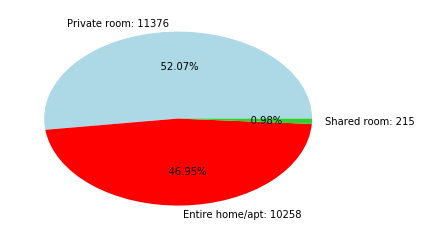

In [21]:
dsh.PrintLine("Room types in whole Berlin:")
vc = dflistcleaned['room_type'].value_counts()

labels = list(vc.index)
values = list(vc.values)
labels[0] += ': ' + str(vc.values[0])
labels[1] += ': ' + str(vc.values[1])
labels[2] += ': ' + str(vc.values[2])
fig1, ax1 = plt.subplots()
#labels2 = labels + [str(values[0]), str(values[1])], str(values[2])]
ax1.pie(values, labels = labels, autopct='%9.2f%%', colors = [_col1, _col2, _col3])

plt.show()

As I'm not interested in 'Shared rooms', I remove listings where the room is shared:

In [22]:
dflistcleaned = dsh.RemoveRowsWithValueInColumn(dflistcleaned, 'room_type', ['Shared room'])

215 rows (ca. 0.98%) have been removed with value/s "['Shared room']" in column "room_type"


And now have a look at how many of each room type is present in each neighborhood:

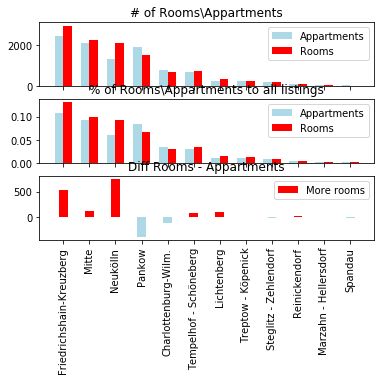

In [23]:
groups = dflistcleaned.groupby(['neighbourhood_group_cleansed'])

groups = sorted(groups, 
      key = lambda x: len(x[1]),
      reverse = True)

grplen = len(groups)
indices = range(grplen)
names = []
appartments = []
rooms = []

diffAppRoomCountHood = []

for ind, (key, df) in enumerate(groups):
    vc = df['room_type'].value_counts()
    appartments.append(vc['Entire home/apt'])
    rooms.append(vc['Private room'])
    names.append(key)
    val = vc['Private room'] - vc['Entire home/apt']
    diffAppRoomCountHood.append(vc['Private room'] - vc['Entire home/apt'])
    
indices = tuple(indices)
width = np.min(np.diff(indices))/3

fig, axarr = plt.subplots(3, sharex = True)

#axarr[0].plot(indices, tuple(appartments))
axarr[0].set_title('# of Rooms\Appartments')
axarr[0].bar(indices - width/2, tuple(appartments), width, color = _col1)
axarr[0].bar(indices + width/2, tuple(rooms), width, color = _col2)
axarr[0].legend(['Appartments', 'Rooms'])

appartmentsProp = np.divide(appartments, dflist.shape[0])
roomsProp = np.divide(rooms, dflist.shape[0])

axarr[1].set_title('% of Rooms\Appartments to all listings')
axarr[1].bar(indices - width/2, tuple(appartmentsProp), width, color = _col1)
axarr[1].bar(indices + width/2, tuple(roomsProp), width, color = _col2)
axarr[1].legend(['Appartments', 'Rooms'])

axarr[2].set_title('Diff Rooms - Appartments')

dfcolmap = pd.DataFrame({'DiffRoomAppCount' : diffAppRoomCountHood})

dfcolmap['MoreRoomThanApp'] = dfcolmap['DiffRoomAppCount'] > 0

axarr[2].bar(indices, tuple(diffAppRoomCountHood), width, color = dfcolmap['MoreRoomThanApp'].map({True : _col2, False : _col1}))
axarr[2].legend(['More rooms', 'more appt.'])

plt.xticks(tuple(range(len(names))),tuple(names), rotation = 90)

plt.show()

Except Pankow and roughly Charlottenburg, each hood provides more rooms than appartments. 

And now the average prices in each neighborhood:

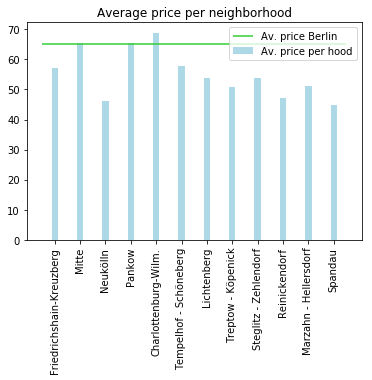

                        Hood     Prices
0   Friedrichshain-Kreuzberg  57.255146
1                      Mitte  65.277321
2                   Neukölln  46.173825
3                     Pankow  65.500145
4       Charlottenburg-Wilm.  68.810253
5     Tempelhof - Schöneberg  57.688312
6                Lichtenberg  53.859177
7         Treptow - Köpenick  50.753199
8      Steglitz - Zehlendorf  53.783654
9              Reinickendorf  47.000000
10     Marzahn - Hellersdorf  51.030612
11                   Spandau  44.902174
count    22572.000000
mean        65.157673
std        204.781655
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64


In [24]:
groups = dflistcleaned.groupby(['neighbourhood_group_cleansed'])

groups = sorted(groups, 
      key = lambda x: len(x[1]),
      reverse = True)

grplen = len(groups)
indices = range(grplen)
names = []
prices = []

for ind, (key, df) in enumerate(groups):
    prices.append(df['price'].mean())
    names.append(key)

width = np.min(np.diff(indices))/4

indices = tuple(indices)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.bar(indices, tuple(prices), width, color = _col1)

plt.hlines(descPrice['mean'], xmin = -0.5, xmax = 11.5, colors = _col3)

ax.axes.set_xticklabels(names)

plt.xticks(rotation = 90)
plt.xticks(np.arange(0, grplen, step = 1))

ax.legend(['Av. price Berlin', 'Av. price per hood'])

ax.set_title('Average price per neighborhood')

plt.show()

# I store the data, maybe I need them.
dfNeighAvPrice = pd.DataFrame({'Hood' : names, 'Prices' : prices})
print(dfNeighAvPrice)
print(descPrice)

So Charlottenburg, Pankow and Mitte are hoods with the highest average list price and - surprise, surprise - Neuköln with the lowest average rate.

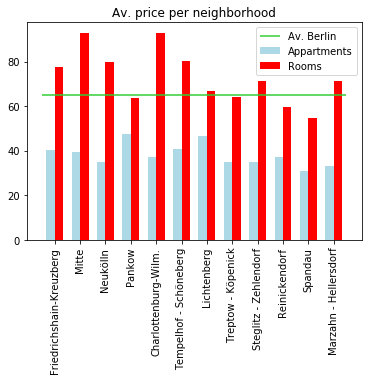

In [25]:
groupedby = ['neighbourhood_group_cleansed', 'room_type']
groups = dflistcleaned.groupby(groupedby)

groups = sorted(groups, 
      key = lambda x: len(x[1]),
      reverse = True)

grplen = int(len(groups) / len(groupedby))
indices = range(grplen)
names = []
pricesA = []
pricesR = []

#fig.set_size_inches(40, 40)
for ind, (key, df) in enumerate(groups):
    if 'Private' in key[1]:
        pricesR.append(df['price'].mean())
    elif 'Entire' in key[1]:
        pricesA.append(df['price'].mean())
    else:
        print(key)
    if key[0] in names:
        continue
    names.append(key[0])

indices = tuple(indices)
width = np.min(np.diff(indices))/3

fig, axarr = plt.subplots()

#axarr[0].plot(indices, tuple(appartments))
#axarr.set_title('Average price of appartments\nrooms in each neighborhood')
axarr.bar(indices - width/2, tuple(pricesR), width, color = _col1)
axarr.bar(indices + width/2, tuple(pricesA), width, color = _col2)

plt.xticks(tuple(range(len(names))),tuple(names), rotation = 90)

plt.hlines(descPrice['mean'], xmin = -0.5, xmax = 11.5, colors = _col3)

axarr.legend(['Av. Berlin', 'Appartments', 'Rooms'])
axarr.set_title('Av. price per neighborhood')

plt.show()

dfNeighAvPrice['AppPrices'] = pd.Series(pricesA).values
dfNeighAvPrice['RomPrices'] = pd.Series(pricesR).values

Interesting to see that the price for a room is partly 200% higher than the price for an appartment.

### Q2 How many rooms/apartments belong to each host? Persons who live/do not live in Berlin? In each neighborhood?

Furthermore, I would like to know how many appartments belong to one each host_id.

In [26]:
grp = dflistcleaned.groupby('host_id')

dirCount = {}
hostids = []
for key, df in grp:
    shpx = df.shape[0] # current hosts number of lists
    if not shpx in list(dirCount.keys()):
        dirCount[shpx] = 0
    dirCount[shpx] = dirCount[shpx] + 1
    if df.shape[0] > 9:
        hostids.append(key)
        
dfPersons = pd.DataFrame(
    {'NumberRoomsOfAPerson' : tuple(dirCount.keys()), 
     'NumberOfPersons' : tuple(dirCount.values())} 
)

In [27]:
for key, df in dflist[dflist['host_id'].isin(hostids) == True].groupby('host_location'):
    print(key, df.shape[0])

Barcelona, Catalonia, Spain 26
Berlin, Berlin, Germany 280
Berlin, New Jersey, United States 11
DE 50
Russia 19


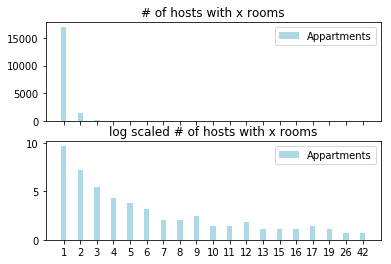

In [28]:
fig, axarr = plt.subplots(2, sharex = True)

sortedPerson = dfPersons.sort_values('NumberRoomsOfAPerson')

indices = tuple(range(sortedPerson.shape[0]))

#axarr[0].plot(indices, tuple(appartments))
axarr[0].set_title('# of hosts with x rooms')
axarr[0].bar(indices, tuple(sortedPerson['NumberOfPersons'].values), width, color = _col1)
axarr[0].legend(['Appartments', 'Rooms'])


axarr[1].set_title('log scaled # of hosts with x rooms')
axarr[1].bar(indices, tuple(np.log(sortedPerson['NumberOfPersons'] + 1)), width, color = _col1)
# I shifted the log +1 because log(1) = 0 and I want to see a bar for all. 

axarr[1].legend(['Appartments', 'Rooms'])

plt.xticks(
    tuple(range(len(sortedPerson['NumberRoomsOfAPerson']))),
    tuple(sortedPerson['NumberRoomsOfAPerson'].values), 
)

plt.show()


Most of the hosts own one appartment. But there are 5 hosts offering 24, 26, 28, 33, and 42 appartments each.

### 3. Preprocessing and feature engineering

## Q2: How many listings belong to persons who live/don't live in Berlin? How is this proportion in each neighborhood?

I use the neighborhood dataframe. As there are some host_locations showing only one part of a popular neighborhood or even just street names, I extract those information from the columns and split "Berlin - Neuköln" into "Berlin" and "Neuköln" to be able to check if a host_location cell contains one of these values.
I consider street names because I assume that it's more likely that only those people who live in berlin, just offer the street name.
I already had a look at the data before and noticed that there is a neighbourhood called 'Buch'. This string cannot be used to identify if a person lives in Berlin because some hosts are located in Bucharest, Romania.

-------------------- Start cleaning values in columns: --------------------
Applied on "neighbourhood_group":  replaced "" for "['DE', 'Buch', ' ']", trimmed
-------------------- Finished cleaning values in columns: --------------------
-------------------- Column "neighbourhood_group" has 18 unique values --------------------
-------------------- Start cleaning values in columns: --------------------
Applied on "neighbourhood":  replaced "" for "['DE', 'Buch', ' ']", trimmed
-------------------- Finished cleaning values in columns: --------------------
-------------------- Column "neighbourhood" has 137 unique values --------------------
Average price of appartments | host lives in Berlin:  58.5797373358349
Average price of appartments | host lives not in Berlin:  59.25063588338877


Text(0.5,1,'App. prices host lives in Berlin')

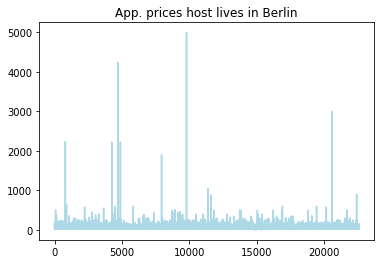

In [29]:
berlinIdentifier = ['Berlin']
berlinIdentifier.extend(dsh.GetUniqueValuesListFromColumn(
    dfneigh,
    column = 'neighbourhood_group',
    trim = True,
    ignoreempty = True,
    splitby = "-",
    clean = {'' : ['DE', 'Buch', ' ']}
))
berlinIdentifier.extend(dsh.GetUniqueValuesListFromColumn(
    dfneigh,
    column = 'neighbourhood',
    trim = True,
    ignoreempty = True,
    splitby = " - ",
    clean = {'' : ['DE', 'Buch', ' ']}
))

dflistcleaned = dsh.AppendColumnByValuesInCell(
    dflistcleaned, 
    column = 'host_location',
    newcolumn = 'LivesInBerlin',
    values = berlinIdentifier
)

dflistBerliner = dflistcleaned[dflistcleaned['LivesInBerlin'] == 1]
dflistNoBerliner = dflistcleaned[dflistcleaned['LivesInBerlin'] == 0]

print('Average price of appartments | host lives in Berlin: ', dflistBerliner['price'].mean())
print('Average price of appartments | host lives not in Berlin: ', dflistNoBerliner['price'].mean())

ax = dflistBerliner['price'].plot(color = _col1)
ax.set_title('App. prices host lives in Berlin')

Text(0.5,1,'App. prices host lives not in Berlin')

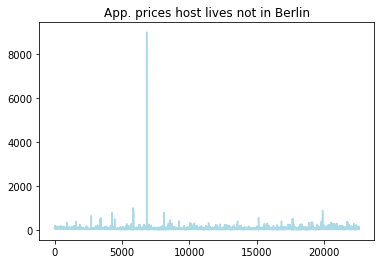

In [30]:
ax = dflistNoBerliner['price'].plot(color = _col1)
ax.set_title('App. prices host lives not in Berlin')

Number of App. hosts living in Berlin:  14177
Number of App. hosts living not in Berlin:  4552


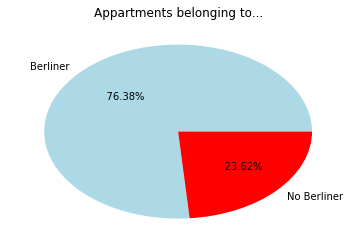

In [31]:
vc = dflistcleaned['room_type'].value_counts()

labels = tuple(['Berliner', 'No Berliner'])
values = [dflistBerliner.shape[0], dflistNoBerliner.shape[0]]

print('Number of App. hosts living in Berlin: ', len(dflistBerliner['host_id'].unique()))
print('Number of App. hosts living not in Berlin: ', len(dflistNoBerliner['host_id'].unique()))

fig1, ax1 = plt.subplots(1)

ax1.set_title('Appartments belonging to...')
ax1.pie(values, labels = labels, autopct='%9.2f%%', colors = [_col1, _col2])

width = 0.1

plt.show()

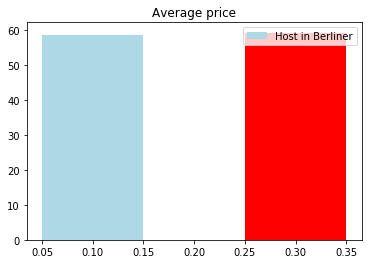

There is almost no difference:  -0.6708985475538682


In [32]:
fig1, ax1 = plt.subplots(1)

width = 0.1

values = [dflistBerliner['price'].mean(), dflistNoBerliner['price'].mean()]
#values = [dflistBerliner.shape[0], dflistNoBerliner.shape[0]]
ax1.set_title('Average price')
ax1.bar(tuple([0.1, 0.3]), tuple(values), width, color = [_col1, _col2])
ax1.legend( ['Host in Berliner', 'Host not in Berliner'])

plt.show()

print('There is almost no difference: ', values[0] - values[1])

And now let's have a look at how the listings are split between Berliner and NoBerliner:

In [33]:
splitedlists = dsh.SplitDataInBinaryColumn(dflistcleaned, column = 'LivesInBerlin')

-------------------- Start splitting data by values [[1], [0]] in column: LivesInBerlin --------------------
New dataframe, based on value list [1] , with shape:  (16523, 97)
New dataframe, based on value list [0] , with shape:  (5111, 97)
-------------------- Finished splitting data --------------------


Text(0.5,1,'Listings per Neighborhood and host location')

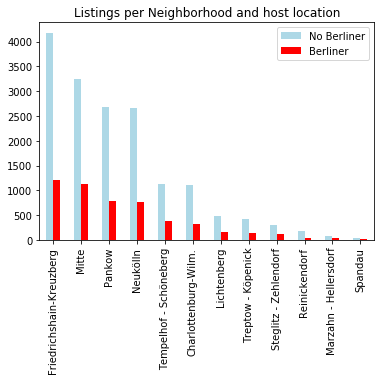

In [34]:
vc1 = splitedlists[0]['neighbourhood_group_cleansed'].value_counts()
vc2 = splitedlists[1]['neighbourhood_group_cleansed'].value_counts()

dfBerlinNeighb = pd.DataFrame(
    {
        'No Berliner' : vc1.values,
        'Berliner' : vc2.values
    })
ax  = dfBerlinNeighb.plot(kind = 'bar', color = [_col1, _col2])
ax.set_xticklabels(vc1.index)
ax.set_title('Listings per Neighborhood and host location')

### 4. Modeling

## Q3: What are the most important features/amenities to describe data? Can they be summarized?

First of all, to answer this question, I need to prepare following columns for model:

In [35]:
dfForModel = dsh.SelectColumnsByWildcard(
    dflistcleaned, 
    wildcards = ['*amenities*', 'property_type*', '*bed_type*', '*bathrooms*', '*bedrooms*', '*beds*', 'price'])

dfResult = dflistcleaned['price']

-------------------- Start finding and keeping columns matchting to wildcards: ['*amenities*', 'property_type*', '*bed_type*', '*bathrooms*', '*bedrooms*', '*beds*', 'price'] --------------------
-------------------- Finished keeping columns matchting to wildcards: 7 --------------------


In [36]:
unqiuevals = dsh.GetUniqueValuesListFromColumn(
    dfForModel, 
    column = 'amenities', 
    trim = True, 
    clean = {'' : ['"', '{', '}']}, 
    splitby = ',', 
    asc = True, 
    ignoreempty = True
)

-------------------- Start cleaning values in columns: --------------------
Applied on "amenities":  replaced "" for "['"', '{', '}']", trimmed
-------------------- Finished cleaning values in columns: --------------------
-------------------- Column "amenities" has 129 unique values --------------------


In [37]:
dfForModel.shape

(21634, 7)

In [38]:
dfForModel[~dfForModel['amenities'].str.contains('Cable TV')].shape[0]

18049

In [39]:
[val for val in unqiuevals if val[0] == ' ' ]

[' toilet']

In [40]:
dfForModel = dsh.ApplyOneHotEncodingOnColumnWithMultiValuesInCell(
    dfForModel, 
    column = 'amenities', 
    values = unqiuevals, 
    drop = True, 
    ignoreEmpty = True)

-------------------- Start applying one hot encoding for columns "amenities" and values "[' toilet', '24-hour check-in', 'Accessible-height bed', 'Accessible-height toilet', 'Air conditioning', 'Air purifier', 'BBQ grill', 'Baby bath', 'Baby monitor', 'Babysitter recommendations', 'Bath towel', 'Bathtub', 'Bathtub with bath chair', 'Beach essentials', 'Beachfront', 'Bed linens', 'Body soap', 'Breakfast', 'Building staff', 'Buzzer/wireless intercom', 'Cable TV', 'Carbon monoxide detector', 'Cat(s)', 'Ceiling hoist', 'Changing table', 'Children’s books and toys', 'Children’s dinnerware', 'Cleaning before checkout', 'Coffee maker', 'Cooking basics', 'Crib', 'Disabled parking spot', 'Dishes and silverware', 'Dishwasher', 'Dog(s)', 'Doorman', 'Dryer', 'EV charger', 'Electric profiling bed', 'Elevator', 'Essentials', 'Ethernet connection', 'Extra pillows and blankets', 'Family/kid friendly', 'Fire extinguisher', 'Fireplace guards', 'Firm mattress', 'First aid kit', 'Fixed grab bars for showe

In [41]:
dfForModel['amenities_Cable TV'].sum()

3585

In [42]:
dfForModel, _ = dsh.ApplyOneHotEncoding(dfForModel, columns = ['property_type', 'bed_type'])

-------------------- Start applying one-hot encoding on: ['property_type', 'bed_type'] --------------------
Columns before one hot encoding:  135
Columns to be removed and replaced:  ['property_type', 'bed_type']
Size after encoding:  143
Columns successfully one hot encoded :)  New columns are:  ['property_type_Apartment', 'property_type_Condominium', 'property_type_House', 'property_type_Loft', 'property_type_Townhouse', 'bed_type_Airbed', 'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed']
Removed columns after one hot encoding:  ['property_type', 'bed_type']
-------------------- Finished applying one-hot encoding --------------------


After encoding and adding new columns, lets drop those with only one value in it.

In [43]:
# Just interested in what kind of amenities are present
ar = dsh.SelectColumnsByWildcard(
    dfForModel, 
    ['amenities*']
).sum(axis = 0).sort_values(ascending = False)
dsh.DfTailHead(ar)

-------------------- Start finding and keeping columns matchting to wildcards: ['amenities*'] --------------------
-------------------- Finished keeping columns matchting to wildcards: 129 --------------------


In [44]:
dfForModel = dsh.ImputeNanValues(dfForModel)

In [45]:
dfForPCA = dfForModel.copy(deep = True)

In [46]:
dfForPCA, scaler = dsh.ScaleFrame(dfForPCA)

In [47]:
dfpca, pca = dsh.ReduceDimensions_PCA(dfForPCA, n_comp = len(dfForPCA.columns))

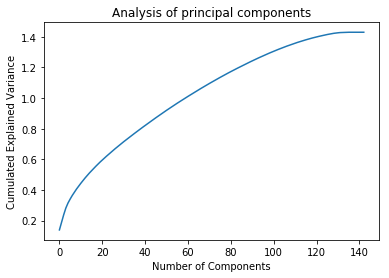

In [48]:
dsh.PCAPlotCumulatedVariances(pca)

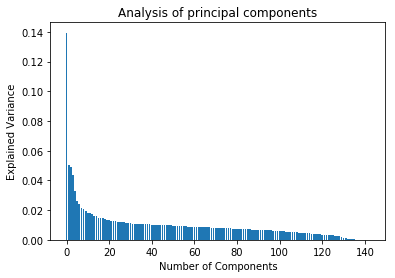

In [49]:
dsh.PCAPlotExplainedVariances(pca)

In [50]:
pca.explained_variance_[0]

13.944475267130905

The first component explains 14% of the whole data.

In [51]:
minPrecision = 0.7
val = 0
pcacomps = 0
for ind, val in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    if val >= minPrecision:
        pcacomps = ind
        print('Using ', ind, ' components because they describe ', val, '% of the whole dataset')
        break

Using  59  components because they describe  0.7011356655962533 % of the whole dataset


In [52]:
dfpca, pca = dsh.ReduceDimensions_PCA(dfForPCA, n_comp = pcacomps)

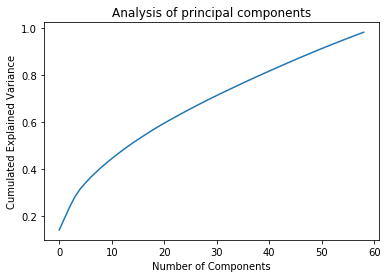

In [53]:
dsh.PCAPlotCumulatedVariances(pca)

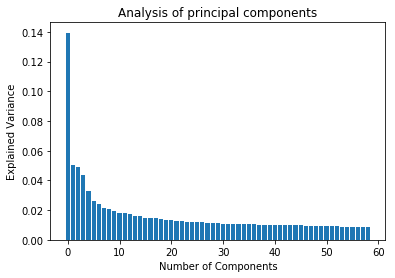

In [54]:
dsh.PCAPlotExplainedVariances(pca)

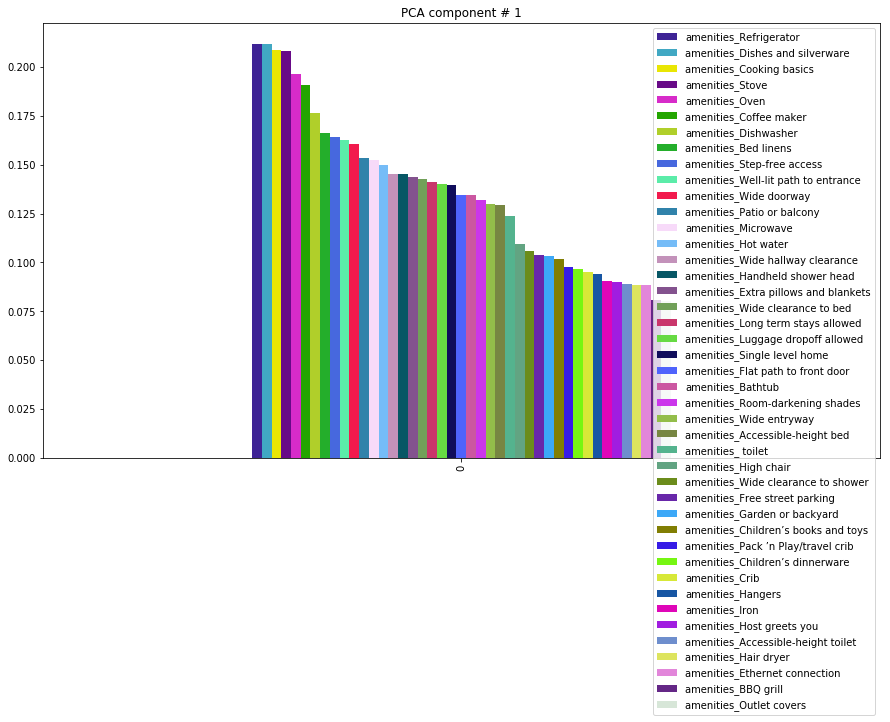

In [55]:
dsh.AnalysePCAResult(pca, 0, pcacomps, dfForModel)

This component describes the latent feature "Allround comfort". The main features driving this component are following amenities: refrigerator, dishes/silverware, stove, cooking basics, oven, coffee maker and so on.

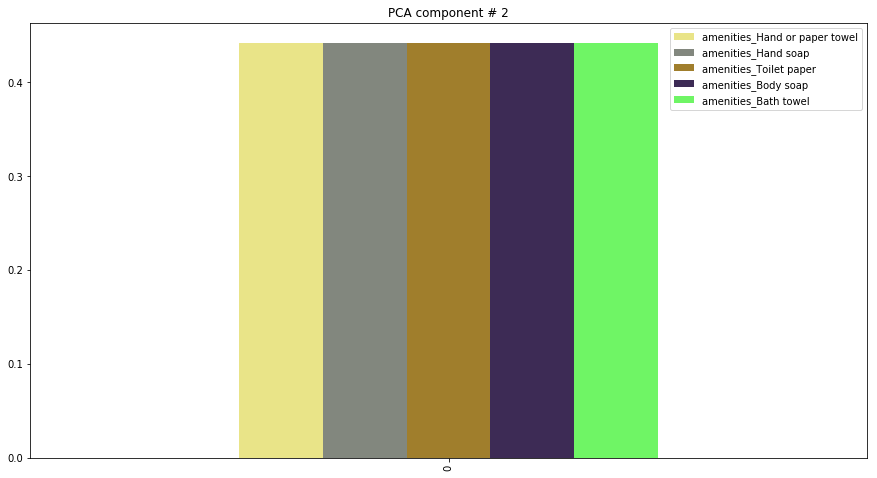

In [56]:
dsh.AnalysePCAResult(pca, 1, pcacomps, dfForPCA)

The seccond component is driven by amenities like bath towel, body soap, hand/paper towel, hand soap, toilet paper and describes the latent feature "Bathing and Cleaning".

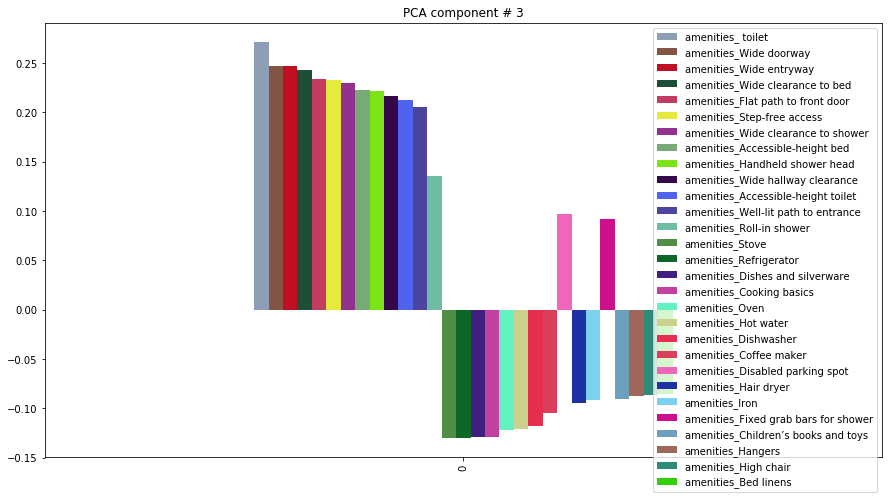

In [57]:
dsh.AnalysePCAResult(pca, 2, pcacomps, dfForPCA)

The third component is driven by toilet, doorway, entryway, clearance, step-free and I would give them the name "House spacing". 
Here are negative correlations. Amenities are encoded 1/0 before scaling so that means here for example that listings that have toilet, wide doorway, wide entryway... DO NOT tend to have NO refridgerator, stove, shishes ans silverware.

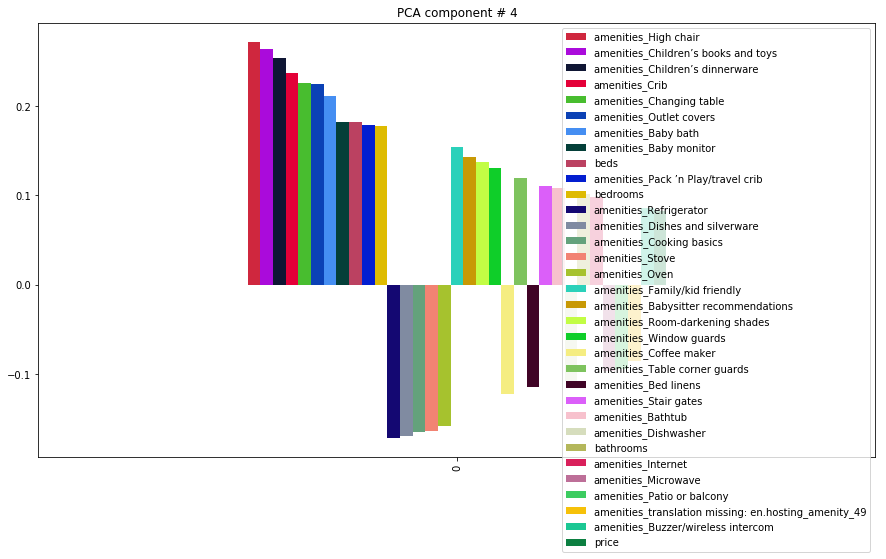

In [58]:
dsh.AnalysePCAResult(pca, 3, pcacomps, dfForPCA)

The features that effect this component the most are: high chair, children's books and toys, children's dinnerware, crib, changig table and obviously describes the latent feature "Child friendly". As we can see here, 

## Q4: What reasonable price could you take offering an appartment with given parameters?

In [59]:
print(dfForModel.shape)
#dfForModel = dfForModel[dfForModel['price'] <= 1000]
print(dfForModel.shape)
#dfForModel = dfForModel[dfForModel['price'] >= 20]
print(dfForModel.shape)

(21634, 143)
(21634, 143)
(21634, 143)


In [60]:
dfForModel.head()

,bathrooms,bedrooms,beds,price,amenities_ toilet,amenities_24-hour check-in,amenities_Accessible-height bed,amenities_Accessible-height toilet,amenities_Air conditioning,amenities_Air purifier,...,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Loft,property_type_Townhouse,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,1.0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,2.0,90.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,125.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,2.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


First of all, I would like to know if the amenities, property- and bed types are good predictors for price. For that, I use the heatmap.

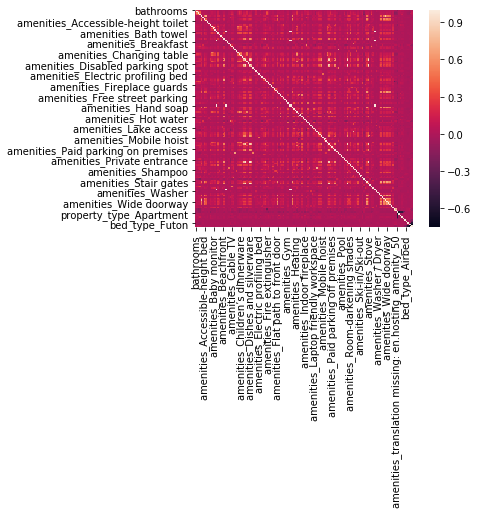

In [61]:
corMat = dsh.PlotHeatmap(dfForModel)

To prevent overfitting, lets remove some features that do not correlate with price.

In [62]:
dfForModelCopy = dfForModel.copy(deep = True)

dfFormodel = dfForModelCopy.copy(deep = True)

In [63]:
interesingVars = corMat['price'].sort_values(ascending = False)
interesingVars = interesingVars[abs(interesingVars) >= 0.05]
interesingVars

price                                                   1.000000
beds                                                    0.431882
bedrooms                                                0.367036
amenities_TV                                            0.313758
amenities_Family/kid friendly                           0.296962
amenities_High chair                                    0.217437
amenities_Cable TV                                      0.209201
amenities_Iron                                          0.199189
amenities_Pack ’n Play/travel crib                      0.193257
amenities_Children’s books and toys                     0.189139
amenities_Long term stays allowed                       0.187444
amenities_Dryer                                         0.173093
amenities_Crib                                          0.170186
amenities_Private entrance                              0.160081
amenities_Elevator                                      0.152263
amenities_Coffee maker   

In [64]:
dfForModel = dfForModel[list(interesingVars.index)]

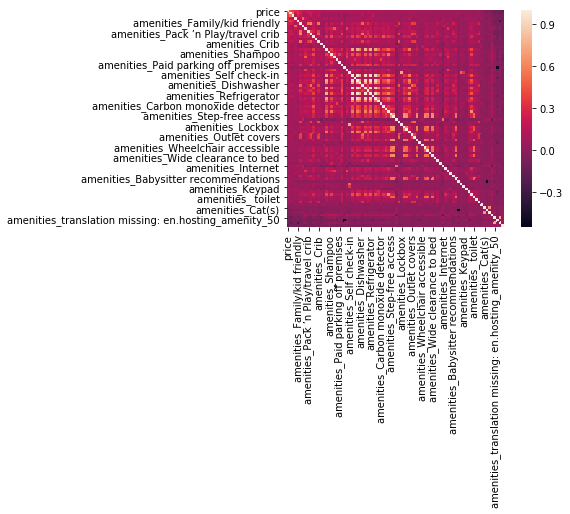

In [65]:
corMat = dsh.PlotHeatmap(dfForModel[list(interesingVars.index)])

In [66]:
dfForModelScaled, scaler = dsh.ScaleFrame(dsh.RemoveColumnsByWildcard(dfForModel, 'price'))

-------------------- Start finding and removing columns matchting to wildcards: ['price'] --------------------
Columns found to remove:  ['price']
-------------------- Finished removing columns matchting to wildcards --------------------


In [67]:
dfForModelScaled.head()

,beds,bedrooms,amenities_TV,amenities_Family/kid friendly,amenities_High chair,amenities_Cable TV,amenities_Iron,amenities_Pack ’n Play/travel crib,amenities_Children’s books and toys,amenities_Long term stays allowed,...,amenities_Baby monitor,amenities_Air conditioning,amenities_Cat(s),bed_type_Futon,amenities_Pets live on this property,amenities_Lock on bedroom door,amenities_translation missing: en.hosting_amenity_50,property_type_Apartment,amenities_translation missing: en.hosting_amenity_49,amenities_Smoking allowed
0,-0.538272,-0.254213,-0.891157,-0.772784,-0.231673,-0.445675,-0.978868,-0.195192,-0.234429,-0.384228,...,-0.068487,-0.116767,-0.144419,-0.106138,-0.211583,-0.536055,-0.488285,0.274315,-0.411128,-0.511114
1,0.372488,-0.254213,-0.891157,1.294023,-0.231673,-0.445675,1.021588,-0.195192,-0.234429,-0.384228,...,-0.068487,-0.116767,-0.144419,-0.106138,-0.211583,-0.536055,-0.488285,0.274315,-0.411128,-0.511114
2,-0.538272,-0.254213,-0.891157,-0.772784,-0.231673,-0.445675,1.021588,-0.195192,-0.234429,2.602619,...,-0.068487,-0.116767,6.924283,-0.106138,4.726272,-0.536055,2.047984,0.274315,2.432332,-0.511114
3,-0.538272,-0.254213,1.122136,-0.772784,-0.231673,2.243789,1.021588,-0.195192,-0.234429,-0.384228,...,-0.068487,8.564090,-0.144419,-0.106138,-0.211583,-0.536055,-0.488285,-3.645449,-0.411128,-0.511114
4,0.372488,-0.254213,-0.891157,1.294023,-0.231673,-0.445675,-0.978868,-0.195192,-0.234429,-0.384228,...,-0.068487,-0.116767,-0.144419,-0.106138,-0.211583,-0.536055,2.047984,0.274315,-0.411128,-0.511114


The price column has been removed before scaling, so lets add it again to get splitted into train, test.

In [68]:
X, y = dfForModelScaled.values, dfForModel['price']

In [69]:
XTrain, XTest, yTrain, yTest = dsh.SplitDataTrainTest(
    X, 
    y.values, 
    testSize = 0.25, 
    randomState = 42
)

For price prediction, I use the random forest regression model because the price is a continuous variable.

In [70]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 42)
#model = LinearRegression()
model.fit(XTrain, yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [71]:
yTrainPred = model.predict(XTrain)

In [72]:
yTestPred = model.predict(XTest)

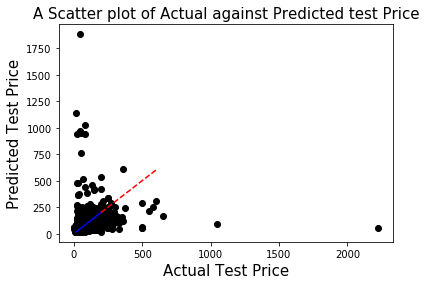

In [73]:
fig, ax = plt.subplots()
ax.scatter(yTest, yTestPred, color = 'black')
#plt.plot(yTest, yTest, color='blue', linewidth=3)
ax.plot([yTestPred.min(), 200], [yTestPred.min(), 200], color = "blue", linestyle = "solid")
ax.plot([200, 600], [200, 600], "r--")

ax.set_xlabel('Actual Test Price', fontsize = 15)
ax.set_ylabel('Predicted Test Price', fontsize = 15)
ax.set_title("A Scatter plot of Actual against Predicted test Price", fontsize = 15)

plt.show()

In [74]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [75]:
trainScore  = mse(yTrain, yTrainPred)
testScore = mse(yTest, yTestPred)

print("The train score is {}".format(trainScore))
print("The test score is {}".format(testScore))

The train score is 2772.6408897661286
The test score is 4529.594760070021


In [76]:
trainScore  = r2_score(yTrain, yTrainPred)
testScore = r2_score(yTest, yTestPred)
print("The train score is {}".format(trainScore))
print("The test score is {}".format(testScore))

The train score is 0.750599452016081
The test score is -0.5259649298581792


In [82]:
from sklearn.model_selection import GridSearchCV
estim = [2 * i for i in range(2, 6)]
maxF = list(i * 1 for i in range(1, len(dfForModel.columns)))
paraGrid = [
    {
        'n_estimators': estim, 
        'max_features': maxF,
    },
    {
        'bootstrap': [False], 
        'n_estimators': estim, 
        'max_features': maxF,
    },    
  ]

model2 = RandomForestRegressor(random_state = 42)

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
gridSearch = GridSearchCV(
    model2, paraGrid, 
    cv = 5,
    scoring = 'neg_mean_squared_error', 
    return_train_score = True,
    n_jobs = 4
)

gridSearch.fit(XTrain, yTrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'n_estimators': [4, 6, 8, 10], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, ...9, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_err

In [83]:
gridSearch.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [84]:
gridSearch.best_params_

{'max_features': 1, 'n_estimators': 10}

In [85]:
tunedModel = gridSearch.best_estimator_
tunedPred = tunedModel.predict(XTest)

tunedScore = r2_score(yTest, tunedPred)
print("The test score is {}".format(tunedScore))

The test score is -0.18701731391541454
